In [1]:
# IO-related
import os.path as osp
import imageio.v2 as imageio
from PIL import Image

# image processing
import numpy as np
import skimage as ski
import skimage.morphology as skm
import skimage.measure as skmeas
import scipy.ndimage as ndi
import scipy.signal as scs

# visualization
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import cv2


In [3]:
def view(img):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    return Image.fromarray(img)

In [76]:
a = np.zeros(np.shape(edge))


class Hough_round:
    
    image = None
    edge = None
    pattern = None
    r = None
    coef_space = None
    res_circle_coord = None
    
    def __init__(self, r):
        
        self.r = r
        self.pattern = self.make_circle_pattern(r)
        
        
    def make_circle_pattern(self, r):
    
        pattern = np.zeros((2 * r + 1, 2 * r + 1))
    
        for i in range((-1) * r, r + 1):
            for j in range((-1)*r, r + 1):
                if np.rint(((abs(i))**2 + (abs(j))**2)**0.5) == r:
                    pattern[i + r, j + r] = 1
    
        return pattern

    def make_circle(self, arr, i, j):
        
        r = self.r
        height, width = np.shape(arr)
        
        if (i-r)>=0 and (i+r+1)< height and (j-r)>=0 and (j+r+1)<width:
            arr[i-r:i+r+1, j-r:j+r+1] += self.pattern
        return arr
    
    def fit(self, im):
        
        
        
        t_lower = 100
        t_upper = 400
        edge = cv2.Canny(im, t_lower, t_upper)
        
        self.coef_space = np.zeros(np.shape(edge))
        self.image = im
        self.edge = edge
        
        
        height, width = np.shape(edge)
        
        for i in range(height):
            for j in range(width):
                if edge[i, j]:
                    self.coef_space = self.make_circle(self.coef_space, i, j)
                    
        min_val = np.min(self.coef_space)
        max_val = np.max(self.coef_space)
        self.coef_space = (self.coef_space - min_val)/(max_val-min_val)
        
        self.res_circle_coord = self.coef_space > 0.8
                    
    def draw_circle(self):
        
        height, width = np.shape(self.coef_space)
        
        for i in range(height):
            for j in range(width):
                if self.res_circle_coord[i, j]:
                    r = self.r
                    
                    if (i-r)>=0 and (i+r+1)< height and (j-r)>=0 and (j+r+1)<width:
                        
                        self.image[i-r:i+r+1, j-r:j+r+1][self.pattern.astype(bool)] = [255, 0, 0]
                    
        
        
        
        
        

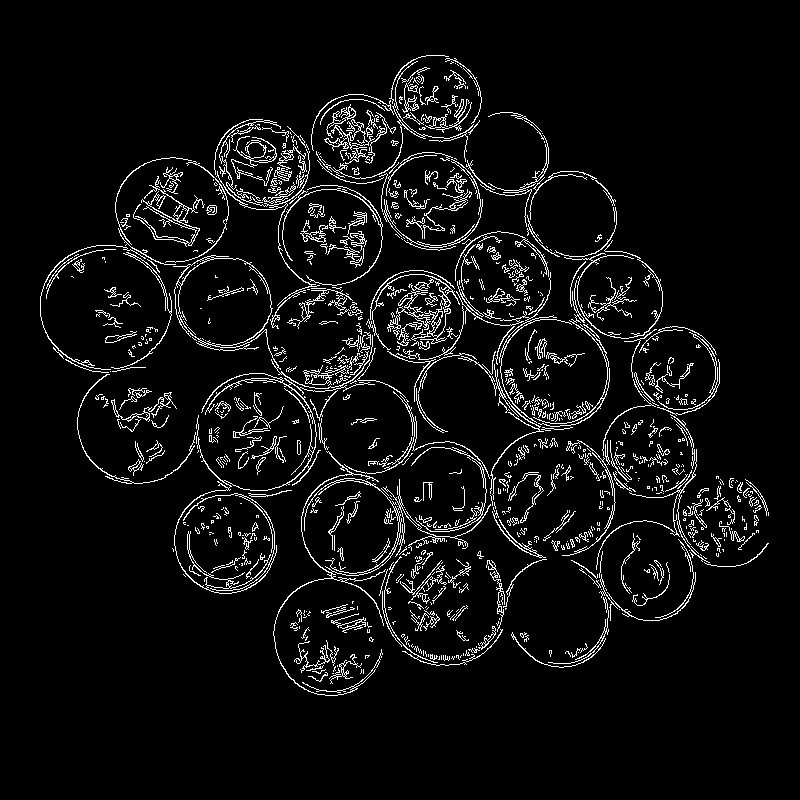

In [77]:
im1 = imageio.imread('coins.jpg')
hough1 = Hough_round(60)
hough1.fit(im1)
view(hough1.edge)


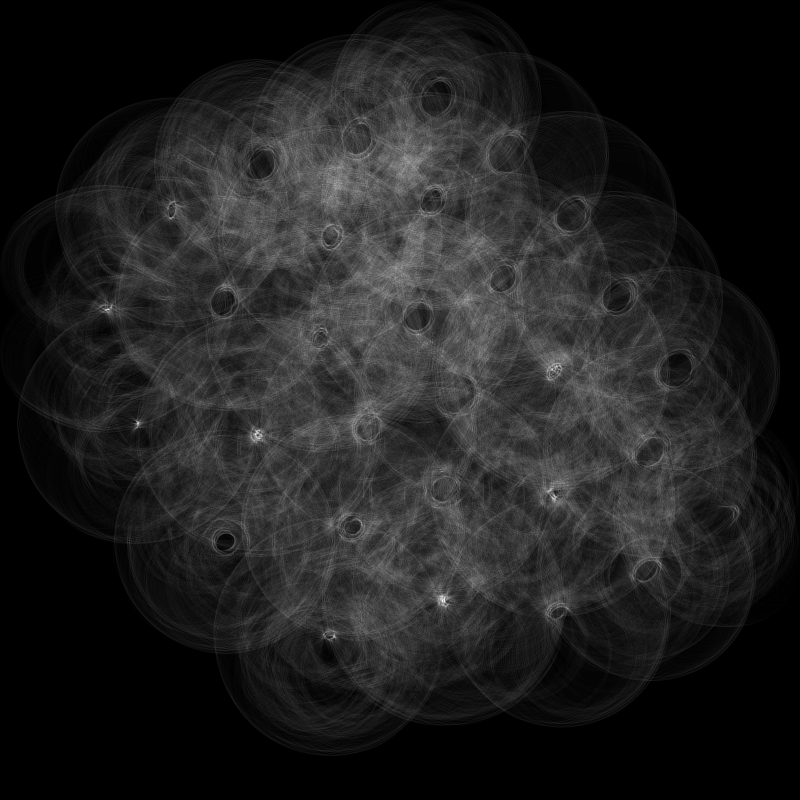

In [78]:
view(hough1.coef_space)

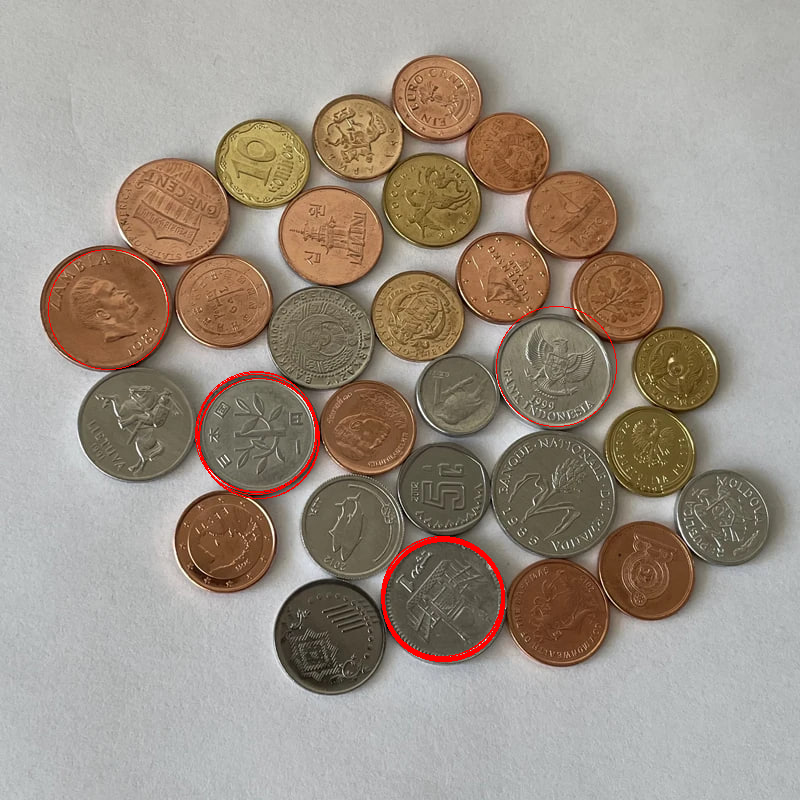

In [79]:
hough1.draw_circle()

view(hough1.image)

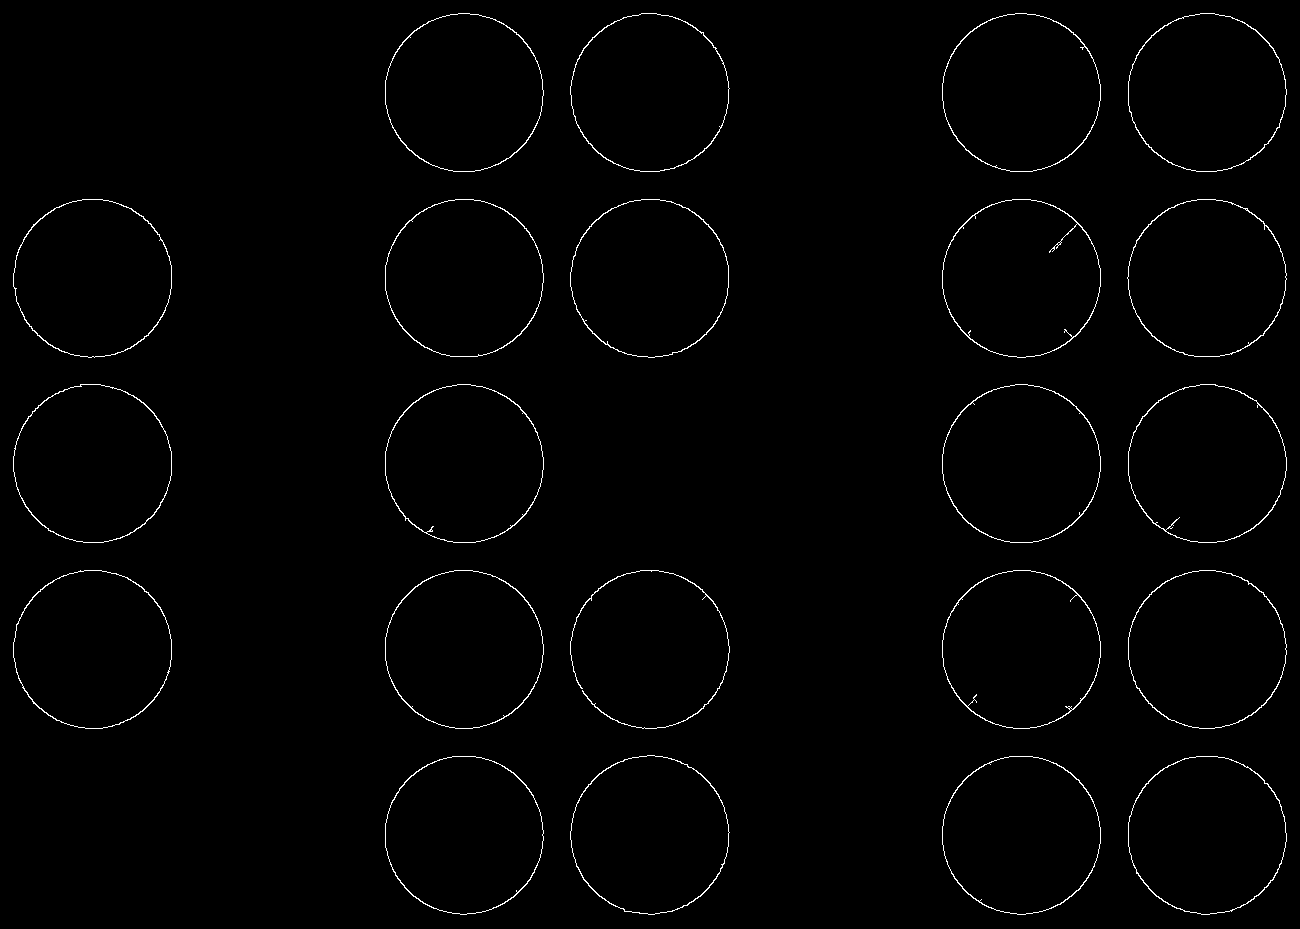

In [96]:
im2 = imageio.imread('im2.jpg')
hough2 = Hough_round(80)
hough2.fit(im2)
view(hough2.edge)

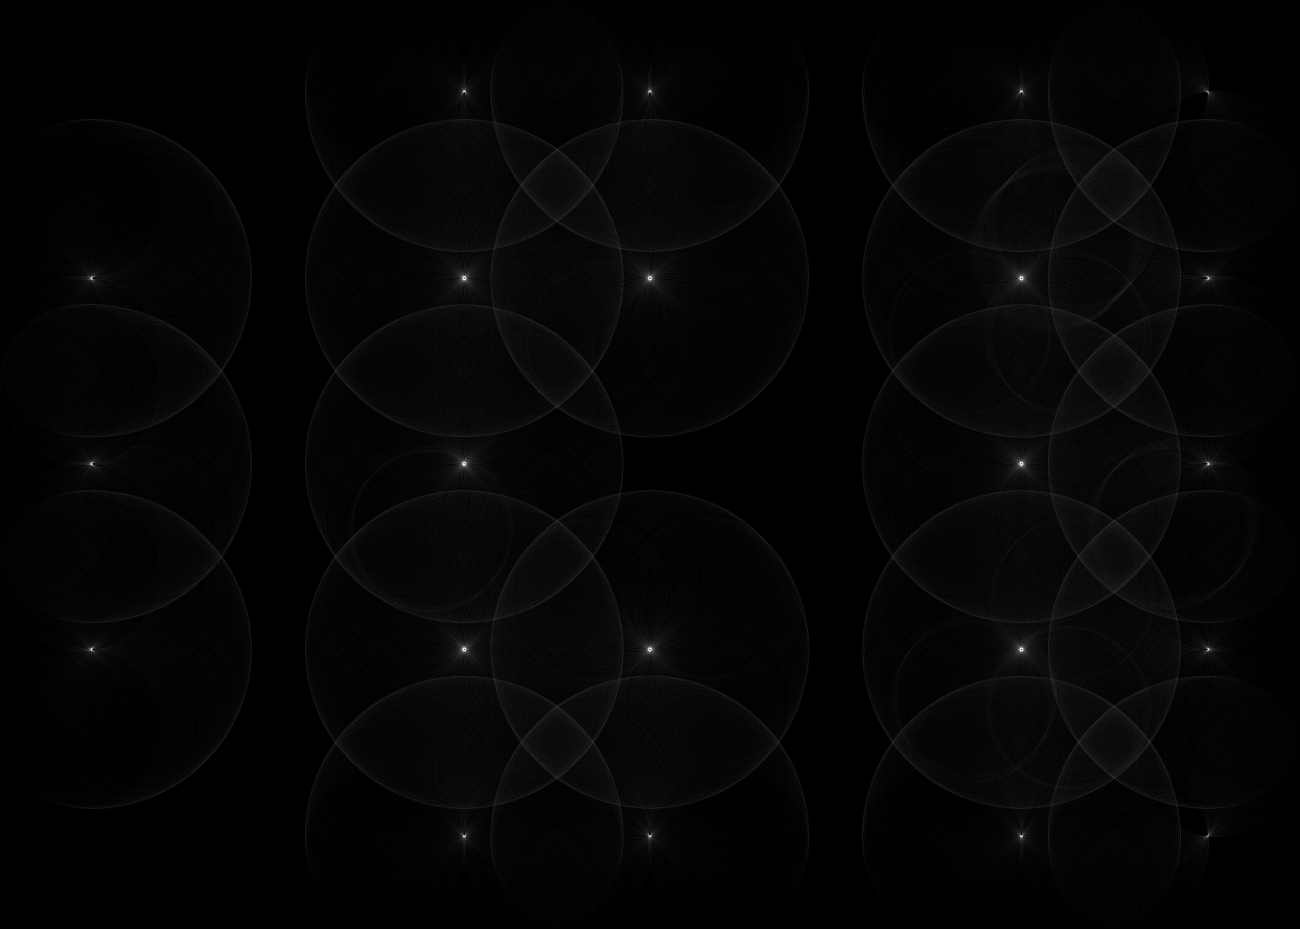

In [97]:
view(hough2.coef_space)

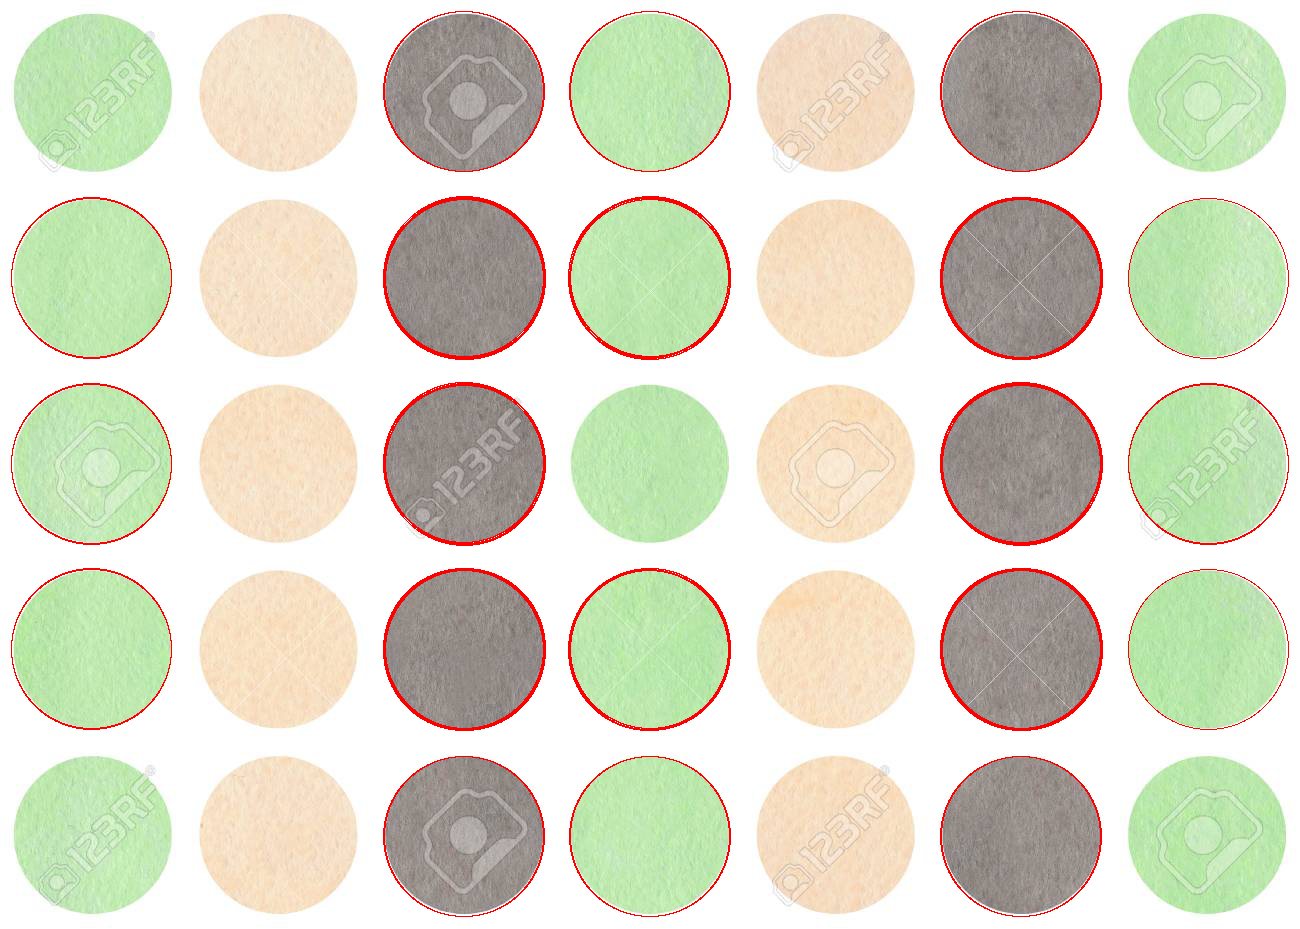

In [98]:
hough2.draw_circle()

view(hough2.image)